# Advent of Code 2016

___

[**Day 1**](#day1) &nbsp; &nbsp; &nbsp; [**Day 2**](#day2) &nbsp; &nbsp; &nbsp; [**Day 3**](#day3) &nbsp; &nbsp; &nbsp; [**Day 4**](#day4) &nbsp; &nbsp; &nbsp; [**Day 5**](#day5)

[**Day 6**](#day6) &nbsp; &nbsp; &nbsp; [**Day 7**](#day7) &nbsp; &nbsp; &nbsp; [**Day 8**](#day8) &nbsp; &nbsp; &nbsp; [*Day 9*](#day9) &nbsp; &nbsp; &nbsp; [**Day 10**](#day10)

[Day 11](#day11) &nbsp; &nbsp; [**Day 12**](#day12) &nbsp; &nbsp; [**Day 13**](#day13) &nbsp; &nbsp; [**Day 14**](#day14) &nbsp; &nbsp; [**Day 15**](#day15)

[**Day 16**](#day16) &nbsp; &nbsp; [**Day 17**](#day17) &nbsp; &nbsp; [**Day 18**](#day18) &nbsp; &nbsp; [Day 19](#day19) &nbsp; &nbsp; [**Day 20**](#day20)

[Day 21](#day21) &nbsp; &nbsp; [Day 22](#day22) &nbsp; &nbsp; [Day 23](#day23) &nbsp; &nbsp; [Day 24](#day24) &nbsp; &nbsp; [Day 25](#day25)

___

<a class="anchor" id="day1"></a>

## Day 1

Taxicab geometry.

Given a set of instructions, determine how far away (in city blocks) you end up from your starting point.  Instructions are given like "R6" which means turn right 90 degrees and walk 6 blocks.  You begin facing north.

*Part 1*  
How many blocks do you end up away from your starting position after doing all the instructions?

*Part 2*  
What is the first location that you visit (pass over) twice? (Doesn't need to be a landing spot, going north 7 means you visited 7 locations to get there).

In [1]:
with open('data2016/day1.txt') as f1:
    steps = f1.read()[:-1].split(', ')
    
steps[-5:]

['R2', 'R2', 'R5', 'L1', 'L2']

**Part 1**

In [2]:
direction = 0  # [0, 1, 2, 3] = [N, W, S, E]
x, y = 0, 0

for step in steps:
    rot, dist = step[0], int(step[1:])
    direction = ((direction + 1) % 4) if rot == 'L' else ((direction - 1) % 4)
    if direction == 0:
        y += dist
    elif direction == 1:
        x -= dist
    elif direction == 2:
        y -= dist
    elif direction == 3:
        x += dist
        
abs(x) + abs(y)

299

**Part 2**

In [3]:
direction = 0  # [0, 1, 2, 3] = [N, W, S, E]
x, y = 0, 0
visited = [(0, 0)]
found = False

for step in steps:
    if found:
        break
    rot, dist = step[0], int(step[1:])
    direction = ((direction + 1) % 4) if rot == 'L' else ((direction - 1) % 4)
    if direction == 0:
        new_places = [(x, y+i) for i in range(1, dist+1)]
        y += dist
    elif direction == 1:
        new_places = [(x-i, y) for i in range(1, dist+1)]
        x -= dist
    elif direction == 2:
        new_places = [(x, y-i) for i in range(1, dist+1)]
        y -= dist
    elif direction == 3:
        new_places = [(x+i, y) for i in range(1, dist+1)]
        x += dist
    #print(step, (x, y), new_places)
    for np in new_places:
        if np in visited:
            print(f'found it: {np} with dist of {abs(np[0]) + abs(np[1])}')
            found = True
            break
        else:
            visited.append(np)


found it: (-176, -5) with dist of 181


<a class="anchor" id="day2"></a>

## Day 2

Need the code for the bathroom door.

The input pad for the bathroom door is arranged like this:

    1  2  3
    4  5  6
    7  8  9
    
To determine the password, a line of instructions gives movements that should be taken (only if possible) relative to a starting position of 5.  For example, the line of instructions "ULDDDRRRU" would go up to 2, left to 1, down to 4, down to 7, down (can't) stay at 7, right to 8, right to 9, right (can't) stay at 9, up to 6, so that digit would be 6.

*Part 1*  
Determine the password to use the bathroom given the puzzle input.

*Part 2*  
Determine the password given the diamond-shaped keypad:

    .  .  1  .  .
    .  2  3  4  .
    5  6  7  8  9
    .  A  B  C  .
    .  .  D  .  .

In [4]:
with open('data2016/day2.txt') as f2:
    lines = [row.strip() for row in f2.readlines()]
    
lines[-1]

'RUDLLUDRRDRRLRURRULRLRDUDLRRLRDDUDRDLRRLLRURRDDLRLLRRURULRUULDUDUULDULDLRLRDLRDLRUURLDRLUDRRDDDRDRRRDDLLLRRLULLRRDDUDULRDRDUURLDLRULULUDLLDRUDUURRUDLLRDRLRRUUUDLDUDRRULLDURRDUDDLRURDLDRLULDDURRLULLRDDDRLURLULDLRUDLURDURRUDULDUUDLLLDDDUUURRRDLLDURRDLULRULULLRDURULLURDRLLRUUDDRRUDRDRRRURUUDLDDRLDRURULDDLLULULURDLDLDULLRLRDLLUUDDUDUDDDDRURLUDUDDDRRUDDLUDULLRDLDLURDDUURDLRLUUDRRULLRDLDDDLDULDUDRDUUULULDULUDLULRLRUULLDURLDULDRDLLDULLLULRLRD'

**Part 1**

In [5]:
numpad = {(0, 0): 1, (0, 1): 2, (0, 2): 3,
          (1, 0): 4, (1, 1): 5, (1, 2): 6,
          (2, 0): 7, (2, 1): 8, (2, 2): 9,}

numpad_rev = {v: k for k, v in numpad.items()}

def eval_line(start_num, line):
    row, col = numpad_rev[start_num]
    for char in line:
        if char == 'U':
            row = max(0, row-1)
        elif char == 'D':
            row = min(2, row+1)
        elif char == 'R':
            col = min(2, col+1)
        elif char == 'L':
            col = max(0, col-1)
    return numpad[(row, col)]


In [6]:
sample = ['ULL', 'RRDDD', 'LURDL', 'UUUUD']
start_num = 5
code = ''
for row in sample:
    digit = eval_line(start_num, row)
    code += str(digit)
    start_num = digit
    
code

'1985'

In [7]:
digit = 5
password = ''

for row in lines:
    digit = eval_line(digit, row)
    password += str(digit)
    
password

'53255'

**Part 2**

In [8]:
numpad2 = {(0, 0): -1, (0, 1): -1, (0, 2): 1, (0, 3): -1, (0, 4): -1,
           (1, 0): -1, (1, 1):  2, (1, 2): 3, (1, 3):  4, (1, 4): -1,
           (2, 0):  5, (2, 1):  6, (2, 2): 7, (2, 3):  8, (2, 4):  9,
           (3, 0): -1, (3, 1): 'A',(3, 2):'B',(3, 3): 'C',(3, 4): -1,
           (4, 0): -1, (4, 1): -1, (4, 2):'D',(4, 3): -1, (4, 4): -1,}

numpad2_rev = {v: k for k, v in numpad2.items() if v != -1}

def eval_line2(start_dig, line):
    row, col = numpad2_rev[start_dig]
    for char in line:
        if char == 'U':
            row = row-1 if ((row > 0) and (numpad2[(row-1, col)] != -1)) else row
        elif char == 'D':
            row = row+1 if ((row < 4) and (numpad2[(row+1, col)] != -1)) else row
        elif char == 'R':
            col = col+1 if ((col < 4) and (numpad2[(row, col+1)] != -1)) else col
        elif char == 'L':
            col = col-1 if ((col > 0) and (numpad2[(row, col-1)] != -1)) else col
    return numpad2[(row, col)]


In [9]:
sample = ['ULL', 'RRDDD', 'LURDL', 'UUUUD']

dig = 5
code = ''
for row in sample:
    dig = eval_line2(dig, row)
    code += str(dig)
code

'5DB3'

In [10]:
dig = 5
password2 = ''
for row in lines:
    dig = eval_line2(dig, row)
    password2 += str(dig)
password2

'7423A'

<a class="anchor" id="day3"></a>

## Day 3

*Part 1*  
How many of the given sets of three side lengths could form a triangle?

*Part 2*  
Triangle triples are actually arranged vertically in groups of three, not horizontally. Now how many actual triangles are there?

In [11]:
with open('data2016/day3.txt') as f3:
    triples_str = [row.strip() for row in f3.readlines()]
    
triples = [[int(x) for x in row.split()] for row in triples_str]
triples[:4]

[[810, 679, 10], [783, 255, 616], [545, 626, 626], [84, 910, 149]]

**Part 1**

In [12]:
sum([sorted(row)[2] < sum(sorted(row)[:2]) for row in triples])

869

**Part 2**  


In [13]:
columns = [[row[i] for row in triples] for i in range(3)]
triples2 = [columns[0][i:i+3] for i in range(0, len(columns[0]), 3)] + \
           [columns[1][i:i+3] for i in range(0, len(columns[1]), 3)] + \
           [columns[2][i:i+3] for i in range(0, len(columns[2]), 3)]


In [14]:
triples2[-5:]

[[248, 224, 241],
 [245, 409, 355],
 [96, 360, 370],
 [108, 503, 421],
 [702, 665, 873]]

In [15]:
sum([sorted(row)[2] < sum(sorted(row)[:2]) for row in triples2])

1544

<a class="anchor" id="day4"></a>

## Day 4

Need to test if a given room name matches its checksum.  For **Part 1**, find the sum of all room numbers that have a room name that matches its checksum.

The checksum for the room name is given in brackets and consists of the 5 most common letters, listed in order of frequency, with ties broken by alphabetization.

For **Part 2**, decrypt the room names by cycling them alphabetically their room number of letters.  Find the room number o fthe room with storage for items for the north pole.

In [16]:
samples = ['aaaaa-bbb-z-y-x-123[abxyz]',   # is a real room 
           'a-b-c-d-e-f-g-h-987[abcde]',   # is a real room
           'not-a-real-room-404[oarel]',   # is a real room
           'totally-real-room-200[decoy]'] # is not

In [17]:
with open('data2016/day4.txt') as f4:
    data = [row.strip() for row in f4.readlines()]
    
data[-5:]

['nchhg-kpwkwtibm-mvoqvmmzqvo-252[mvhko]',
 'uqtqbizg-ozilm-jiasmb-uizsmbqvo-122[ktxvs]',
 'nwlddtqtpo-mldvpe-fdpc-epdetyr-509[dpetl]',
 'wfintfhynaj-idj-qfgtwfytwd-229[efudw]',
 'yhwooebeaz-nwilwcejc-ydkykhwpa-owhao-160[skuyi]']

**Part 1**

In [18]:
def check_checksum(room_string):
    
    first_int_idx = min([i for i in range(len(room_string)) if room_string[i] in '1234567890'])
    first_brack_idx = room_string.index('[')
    
    name = room_string[:first_int_idx]
    number = int(room_string[first_int_idx:first_brack_idx])
    checksum = room_string[first_brack_idx+1:-1]
    
    letters = list(name.replace('-', ''))
    counts = sorted([(letters.count(char), char) for char in set(letters)])[::-1]
    #print(counts)
    check = ''
    while True:
        next_letters = sorted([pair[1] for pair in counts if pair[0] == counts[0][0]])
        for char in next_letters:
            if len(check) < 5:
                check += char
        counts = [c for c in counts if c[1] not in check]
        if len(check) == 5:
            break
    
    #print(check)
    #print(checksum)
    
    return number if check == checksum else 0

In [19]:
check_checksum(samples[0])

123

In [20]:
part1 = sum([check_checksum(room) for room in data])
part1

278221

**Part 2**

In [21]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
def decrypt(room_name, room_number):
    return ''.join([alphabet[(alphabet.index(char) + room_number) % 26] if char != '-' else ' ' for char in room_name])

In [22]:
decrypt('qzmt-zixmtkozy-ivhz', 343)

'very encrypted name'

In [23]:
good_rooms = [room for room in data if check_checksum(room) > 0]
decr_rooms = []
for gr in good_rooms:
    name = gr[:min([i for i in range(len(gr)) if gr[i] in '1234567890'])-1]
    number = int(''.join([char for char in gr if char in '1234567890']))
    decr_rooms.append(decrypt(name, number) + f'  ({number})')
decr_rooms[:3]

['projectile scavenger hunt shipping  (561)',
 'weaponized jellybean technology  (436)',
 'biohazardous basket customer service  (253)']

In [24]:
[room for room in decr_rooms if 'north' in room]

['northpole object storage  (267)']

<a class="anchor" id="day5"></a>

## Day 5

MD5 hashes

**Part 1**  
Our puzzle input is the door id; we want to find strings of the door id plus increasing integers tacked onto the end.  Every time we find one with an MD5 hash that starts with 5 zeros, then take the 6th character as the next character in the password we're looking for.  Find the 8-character password.

In [25]:
import hashlib

In [26]:
hashlib.md5('abc3231929'.encode('utf-8')).hexdigest()

'00000155f8105dff7f56ee10fa9b9abd'

In [27]:
door_id = 'wtnhxymk'
password = ''
i = 1
while len(password) < 8:
    to_check = door_id + str(i)
    hashed = hashlib.md5(to_check.encode('utf-8')).hexdigest()
    if hashed[:5] == '00000':
        password += hashed[5]
        print(hashed)
        print(password)
    i += 1

0000027b9705c7e6fa3d4816c490bbfd
2
00000468c8625d85571d250737c47b5a
24
0000013e3293b49e4c78a5b43b21023b
241
0000040bbe4509b48041007dec6123bd
2414
00000b11810477f9e49840991fb2151e
2414b
00000cc461c8945671046cf632be4473
2414bc
000007c1da6865df78b2c0addf28913d
2414bc7
00000700ce8beb0a8ffc83fa9986d577
2414bc77


**Part 2**

Now, instead, still searching for hashes that start with 5 zeros, but the 6th position indicates the index (if available and within range of 0-7), and the 7th position indicates the character to go at the index of the password as indicated by the 6th char.

    '00000062831' says to put a 2 at the 6th index (7th position) IF that index isn't already filled in the password.

In [28]:
door_id = 'wtnhxymk'
password = '________'
i = 1
found = 0
while found < 8:
    to_check = door_id + str(i)
    hashed = hashlib.md5(to_check.encode('utf-8')).hexdigest()
    if hashed[:5] == '00000':
        idx, char = hashed[5:7]
        if (idx in '01234567') and password[int(idx)] == '_':
            password = list(password)
            password[int(idx)] = char
            password = ''.join(password)
            print(password)
            found += 1
    i += 1

__7_____
__7_6___
_37_6___
_37_6__c
_37_60_c
_37_60fc
_37e60fc
437e60fc


<a class="anchor" id="day6"></a>

## Day 6

Message is coming in but has noise.  The message is repeated, so we just need to find the most common character in each position of the message to decode it.

**Part 1**  
Determine the code being sent by finding the most common letter in each column.

**Part 2**  
Determine the code being sent by finding the least common letter in each column.

(The only code difference is whether we want the first or last (val, char) pair in the sorted counts list)

In [29]:
with open('data2016/day6.txt') as f6:
    messages = [row.strip() for row in f6.readlines()]
    
messages[-3:]

['uufwzhll', 'jnlztauj', 'ktujpjae']

In [30]:
columns = [[row[i] for row in messages] for i in range(len(messages[0]))]
columns[2][:5]

['l', 'd', 'w', 'k', 'n']

In [31]:
part1 = ''.join([sorted([(col.count(char), char) for char in set(col)])[-1][1] for col in columns])
part1

'wkbvmikb'

In [32]:
part2 = ''.join([sorted([(col.count(char), char) for char in set(col)])[0][1] for col in columns])
part2

'evakwaga'

<a class="anchor" id="day7"></a>

## Day 7

Need to determine if an IP supports TLS (transport layer snooping).

Given an IP like:

    abba[mnop]qrst
    
we determine that it does support TLS if (it DOES include a sequence like abba, two distinct chars then their reverse) and (id does NOT include such a sequence like abba inside any brackets).

**Part 1**

How many input IPs in the input support TLS?

In [33]:
def is_abba(s):
    return (s[0] != s[1]) and (s[:2] == s[-1:1:-1])

is_abba('xyyx')

True

In [34]:
sample = 'welumvdtzozzqkc[xunvcqdbwitokoerg]euvhbecekwaszsmxu[xrffdzabspotehwg]uqzwhrvygasatdaphac[xexwfcsgfyvciqdu]kioaakhmp'

In [35]:
def check_tls(addr):
    tls = False
    outside = True
    for i, char in enumerate(addr):
        if char in '[]':
            outside = not outside
            continue
        if tls and outside:
            continue
        if not tls and outside:
            if i + 3 < len(addr) and '[' not in addr[i:i+4]: 
                if is_abba(addr[i:i+4]):
                    tls = True
                    #print(addr[i:i+4], 'good one')
        if not outside:
            if i + 3 < len(addr) and ']' not in addr[i:i+4]:
                if is_abba(addr[i:i+4]):
                    #print(addr[i:i+4], 'bad one')
                    return False
    return tls
            

In [36]:
check_tls('abba[mnop]qrst')

True

In [37]:
check_tls('abcd[bddb]xyyx')

False

In [38]:
with open('data2016/day7.txt') as f6:
    addresses = [row.strip() for row in f6.readlines()]

In [39]:
part1 = sum([check_tls(addr) for addr in addresses])
part1

110

**Part 2**

Now we want to check to see if the IP addresses support SSL (super secret listening).

We want to identify any IP address that has an "aba" sequence outside of the brackets and a complimentary "bab" sequence inside a set of brackets.

Find the number of IP addresses that support SSL.

In [40]:
def ssl_compliment(s1, s2):
    return (s1[0] == s1[2] == s2[1]) and (s1[1] == s2[0] == s2[2]) and (s1[0] != s1[1])

In [41]:
part2 = 0
sample2 = 'abcd[bddb]xyyx'

def get_in_out_trips(addr):
    out_trips = []
    in_trips = []
    outside = True
    for i, char in enumerate(addr[:-2]):
        trip = addr[i:i+3]
        if outside:
            if '[' in trip:
                if trip[0] == '[':
                    outside = False
                continue
            else:
                out_trips.append(trip)
        elif not outside:
            if ']' in trip:
                if trip[0] == ']':
                    outside = True
                continue
            else:
                in_trips.append(trip)
    return out_trips, in_trips

outs, ins = get_in_out_trips(sample)

print(sample)
print()
print(outs)
print()
print(ins)

welumvdtzozzqkc[xunvcqdbwitokoerg]euvhbecekwaszsmxu[xrffdzabspotehwg]uqzwhrvygasatdaphac[xexwfcsgfyvciqdu]kioaakhmp

['wel', 'elu', 'lum', 'umv', 'mvd', 'vdt', 'dtz', 'tzo', 'zoz', 'ozz', 'zzq', 'zqk', 'qkc', 'euv', 'uvh', 'vhb', 'hbe', 'bec', 'ece', 'cek', 'ekw', 'kwa', 'was', 'asz', 'szs', 'zsm', 'smx', 'mxu', 'uqz', 'qzw', 'zwh', 'whr', 'hrv', 'rvy', 'vyg', 'yga', 'gas', 'asa', 'sat', 'atd', 'tda', 'dap', 'aph', 'pha', 'hac', 'kio', 'ioa', 'oaa', 'aak', 'akh', 'khm', 'hmp']

['xun', 'unv', 'nvc', 'vcq', 'cqd', 'qdb', 'dbw', 'bwi', 'wit', 'ito', 'tok', 'oko', 'koe', 'oer', 'erg', 'xrf', 'rff', 'ffd', 'fdz', 'dza', 'zab', 'abs', 'bsp', 'spo', 'pot', 'ote', 'teh', 'ehw', 'hwg', 'xex', 'exw', 'xwf', 'wfc', 'fcs', 'csg', 'sgf', 'gfy', 'fyv', 'yvc', 'vci', 'ciq', 'iqd', 'qdu']


In [42]:
part2 = 0
for addr in addresses:
    outs, ins = get_in_out_trips(addr)
    part2 += any([ssl_compliment(a1, a2) for a1 in outs for a2 in ins])
part2

242

<a class="anchor" id="day8"></a>

## Day 8

Grid of pixels on a screen. Think of the screen as a torus.

We've been given a set of instructions which use 3 different commands:

    rect axb   -   turns on an axb rectangle of lights from the upper left (0, 0)
    
    rotate column x=a by c   -   vertically rotate the pixels in column x=a down by c units (bottom wrap to top)
    
    rotate row y=b by d    -   horizontally rotate the pixels in row y=b to the right by d units (right wraps to left)
    
**Part 1**  
How many lights are on after following the instructions in our puzzle input?

**Part 2**  
Read the message in the display - what is it?

In [43]:
with open('data2016/day8.txt') as f8:
    instructions = [row.strip() for row in f8.readlines()]
    
instructions[:4]

['rect 1x1', 'rotate row y=0 by 2', 'rect 1x1', 'rotate row y=0 by 5']

In [44]:
import numpy as np

nrows, ncols = 6, 50
grid = np.zeros(shape=(nrows, ncols))

In [45]:
def get_light_count(nrows, ncols, instructions):
    grid = np.zeros(shape=(nrows, ncols))
    for inst in instructions:
        words = inst.split()
        if words[0] == 'rect':
            a, b = list(map(int, words[1].split('x')))
            grid[:b, :a] = 1
        elif words[2][0] == 'y':
            row = int(words[2].split('=')[-1])
            shift = int(words[-1])
            grid[row, :] = np.concatenate([grid[row, -shift:], grid[row, :ncols-shift]]) 
        elif words[2][0] == 'x':
            col = int(words[2].split('=')[-1])
            shift = int(words[-1])
            grid[:, col] = np.concatenate([grid[-shift:, col], grid[:nrows-shift, col]])
    return sum(sum(grid)), grid

In [46]:
count, grid = get_light_count(6, 50, instructions)
count

110.0

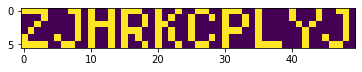

In [47]:
import matplotlib.pyplot as plt
plt.imshow(grid)
plt.show()

<a class="anchor" id="day9"></a>

## Day 9

File Decompression

Files have markers like (3x2)ABC that decompress the string to ABCABC because the tag (3x2) says to repeat the following 3 characters 2 times.

Even if the repeated part is itself a compression tag, treat it like normal characters.

Example:  **X(8x2)(3x3)ABCY** decompresses to **X(3x3)ABC(3x3)ABCY** with a length of 18.

**Part 1**  
What is the decompressed length of the input?

In [48]:
def decompress(s):
    ds = ''
    i = 0
    while i < len(s):
        if s[i] != '(':
            ds += s[i]
            i += 1
        else:
            close_idx = s[i:].index(')') + i
            a, b = map(int, s[i+1:close_idx].split('x'))
            ds += s[close_idx+1:close_idx+1+a]*b
            i = close_idx + a + 1
    return ds

In [49]:
sample = 'X(8x2)(3x3)ABCY'
decompress(sample)

'X(3x3)ABC(3x3)ABCY'

In [50]:
with open('data2016/day9.txt') as f9:
    string = f9.read().strip()

string[-5:]

'MPFRW'

In [51]:
part1 = len(decompress(string))
part1

70186

**Part 2**  
Now, we need to find the fully decompressed length, but its too big to fit in memory, so we need to just calculate it.  Consider the following examples:

    (3x3)XYZ still becomes XYZXYZXYZ, as the decompressed section contains no markers.
    
    X(8x2)(3x3)ABCY becomes XABCABCABCABCABCABCY, because the decompressed data from the (8x2) marker is then further decompressed, thus triggering the (3x3) marker twice for a total of six ABC sequences.
    
    (27x12)(20x12)(13x14)(7x10)(1x12)A decompresses into a string of A repeated 241920 times.
    
        12*12*14*10*12 = 241920
    
    (25x3)(3x3)ABC(2x3)XY(5x2)PQRSTX(18x9)(3x2)TWO(5x7)SEVEN becomes 445 characters long.
    
        3*3*3 + 3*2*3 + 3*5*2 + 1 + 9*3*2 + 9*5*7 = 445

In [52]:
def score_chunk(substr, multiplier):
    
    # the way the substrings are getting passed into this function, 
    #  it will always be either an upcopied regular letter or the beggining
    #  of a compression tag.
    # the compression tag will then either be followed by another tag (recurse)
    #  or not (score)
    
    # If we're just looking at letter that isn't getting copied:
    if substr[0] != '(':
        score = 1
        index_change = 1
    # if we're looking at a compression tag
    elif substr[0] == '(':
        close_idx = substr.index(')')
        a, b = list(map(int, substr[1:close_idx].split('x')))
        # if this is the final tag before the letters to be decompressed
        if substr[close_idx+1] !=  '(':
            score = multiplier * a * b
        # or if there is another decomp tag immediately after
        elif substr[close_idx+1] ==  '(':
            score = score_chunk(substr[close_idx+1: close_idx+a+1], multiplier*b)
        index_change = close_idx + b + 1
        
    # when we see that our substr starts with a decomp tag, we want to find
    #  all regular char chunks and their preceding tags
    
    return score, index_change



    [(25x3)[[(3x3)ABC][(2x3)XY][(5x2)PQRST]][X][(18x9)[(3x2)TWO][(5x7)SEVEN]]

<a class="anchor" id="day10"></a>

## Day 10

Instructions for robots moving microchips.

In [53]:
sample = '''value 5 goes to bot 2
bot 2 gives low to bot 1 and high to bot 0
value 3 goes to bot 1
bot 1 gives low to output 1 and high to bot 0
bot 0 gives low to output 2 and high to output 0
value 2 goes to bot 2'''

In [54]:
sinsts = sample.split('\n')
sinsts

['value 5 goes to bot 2',
 'bot 2 gives low to bot 1 and high to bot 0',
 'value 3 goes to bot 1',
 'bot 1 gives low to output 1 and high to bot 0',
 'bot 0 gives low to output 2 and high to output 0',
 'value 2 goes to bot 2']

In [55]:
with open('data2016/day10.txt') as f10:
    insts = [line.strip() for line in f10.readlines()]
insts[-5:]

['bot 103 gives low to bot 166 and high to bot 127',
 'bot 108 gives low to bot 25 and high to bot 100',
 'bot 207 gives low to bot 171 and high to bot 80',
 'bot 4 gives low to bot 209 and high to bot 28',
 'bot 23 gives low to bot 183 and high to bot 140']

In [56]:
#reminsts = sinsts[:]
reminsts = insts[:]
bots = dict()
outputs = dict()
idx_remove = []
comparison_target = (17, 61)

while len(reminsts) > 0:
    for i, inst in enumerate(reminsts):
        
        words = inst.split()
        
        # assigning a value, pretty simple
        if words[0] == 'value':
            value = int(words[1])
            bot_num = int(words[-1])
            if bot_num not in bots:
                bots[bot_num] = [value]
            else:
                if len(bots[bot_num]) < 2:
                    bots[bot_num].append(value)
            idx_remove.append(i)
        
        # giving two chips to two places (bot or output)
        elif words[2] == 'gives':

            # get variables to use, make sure its valid (has two chips)
            bot_num = int(words[1])
            if (bot_num not in bots) or (len(bots[bot_num]) < 2):
                continue
            low = words[5:7]
            high = words[-2:]
            botlow, bothigh = sorted(bots[bot_num])
            
            # part 1 - want to know what bot makes a certain comparison
            if (botlow, bothigh) == comparison_target:
                print (f'bot {bot_num} compared {comparison_target}')

            # if we give the low value to a bot
            if low[0] == 'bot':
                bot_receiver = int(low[1])
                if bot_receiver not in bots:
                    bots[bot_receiver] = [botlow]
                else:
                    if len(bots[bot_receiver]) < 2:
                        bots[bot_receiver].append(botlow)
                        
            # if we give the low value to an output
            else:
                output_receiver = int(low[1])
                if output_receiver not in outputs:
                    outputs[output_receiver] = [botlow]
                else:
                    outputs[bot_receiver].append(botlow)

            # if we give the high value to a bot
            if high[0] == 'bot':
                bot_receiver = int(high[1])
                if bot_receiver not in bots:
                    bots[bot_receiver] = [bothigh]
                else:
                    if len(bots[bot_receiver]) < 2:
                        bots[bot_receiver].append(bothigh)
            
            # if we give the high value to an output
            else:
                output_receiver = int(high[1])
                if output_receiver not in outputs:
                    outputs[output_receiver] = [bothigh]
                else:
                    outputs[bot_receiver].append(bothigh)
            idx_remove.append(i)
    
    # after each pass through the instructions remaining, only keep the ones we didnt already do
    reminsts = [reminsts[i] for i in range(len(reminsts)) if i not in idx_remove]
    idx_remove = []


# print('bots')
# print(bots)
# print()
# print('outputs')
# print(outputs)         

bot 116 compared (17, 61)


**Part 2**  
What is the product of the values at outputs 0, 1, and 2?

In [57]:
outputs[0][0] * outputs[1][0] * outputs[2][0]

23903

<a class="anchor" id="day11"></a>

## Day 11

Moving things on an elevator.


<a class="anchor" id="day12"></a>

## Day 12

Assembunny code.  The available instructions are:

    cpy x y   - copies x into register y; x may be an integer or a reference to another register
    inc x     - increases the value at register x by 1
    dec x     - decreases the value at register x by 1
    jnz x y   - jumps to an instruction y steps away as long as x is not zero
    
**Part 1**  
After executing the code in the puzzle input, what is the value in register "a"?

In [58]:
with open('data2016/day12.txt') as f12:
    insts = [line.strip() for line in f12.readlines()]
    
insts

['cpy 1 a',
 'cpy 1 b',
 'cpy 26 d',
 'jnz c 2',
 'jnz 1 5',
 'cpy 7 c',
 'inc d',
 'dec c',
 'jnz c -2',
 'cpy a c',
 'inc a',
 'dec b',
 'jnz b -2',
 'cpy c b',
 'dec d',
 'jnz d -6',
 'cpy 14 c',
 'cpy 14 d',
 'inc a',
 'dec d',
 'jnz d -2',
 'dec c',
 'jnz c -5']

In [59]:
# Part 1 - get register a with all starting at 0
# Part 2 - get register a with c instead starting at 1

regs = {'a': 0, 'b': 0, 'c': 1, 'd': 0}
numbers = '1234567890'

i = 0
while i < len(insts):
    
    inst = insts[i]
    parts = inst.split()

    if parts[0] == 'cpy':
        x, y = parts[1:]
        regs[y] = int(x) if x[0] in numbers else regs[x]
        i += 1
    
    elif parts[0] == 'inc':
        regs[parts[1]] += 1
        i += 1
        
    elif parts[0] == 'dec':
        regs[parts[1]] -= 1
        i += 1
        
    elif parts[0] == 'jnz':
        x, y = parts[1:]
        if x[0] in numbers:
            i += int(y) if int(x) != 0 else 1
        else:
            i += int(y) if regs[x] != 0 else 1
    
regs

{'a': 9227661, 'b': 5702887, 'c': 0, 'd': 0}

<a class="anchor" id="day13"></a>

## Day 13

Building and solving a maze.

A maze starts at (0, 0) and extends infinitely in the positive x and y directions.

Every tile in the maze is either a wall or an open space; no diagonal movement.

To determine if an (x, y) location is a wall or open space:

    1) Find x*x + 3*x + 2*x*y + y + y*y.
    2) Add the office designer's favorite number (your puzzle input).
    3) Find the binary representation of that sum; count the number of bits that are 1.
    4) If the number of bits that are 1 is even, it's an open space.
       If the number of bits that are 1 is odd, it's a wall.

In [60]:
import numpy as np

def get_grid(fav_num, nrows, ncols):
    
    grid = np.zeros((nrows, ncols))
    
    for x in range(ncols):
        for y in range(nrows):
            funcval = x*x + 3*x + 2*x*y + y + y*y
            funcval += fav_num
            bin_rep = bin(funcval)[2:]
            count1s = bin_rep.count('1')
            grid[y, x] = -1 if count1s%2 else 0
    
    grid[1, 1] = -2
            
    return grid
    

In [61]:
get_grid(10, 7, 10)

array([[ 0., -1.,  0., -1., -1., -1., -1.,  0., -1., -1.],
       [ 0., -2., -1.,  0.,  0., -1.,  0.,  0.,  0., -1.],
       [-1.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.],
       [-1., -1., -1.,  0., -1.,  0., -1., -1., -1.,  0.],
       [ 0., -1., -1.,  0.,  0., -1.,  0.,  0., -1.,  0.],
       [ 0.,  0., -1., -1.,  0.,  0.,  0.,  0., -1.,  0.],
       [-1.,  0.,  0.,  0., -1., -1.,  0., -1., -1., -1.]])

In [62]:
def get_dist_to_goal(grid, goalx, goaly):
    
    def get_surrounding(x1, y1):
        neighbors = []
        if x1 > 0: neighbors.append((x1-1, y1))
        if x1 < len(grid[0]): neighbors.append((x1+1, y1))
        if y1 > 0: neighbors.append((x1, y1-1))
        if y1 < len(grid): neighbors.append((x1, y1+1))
        return neighbors
        
    dist = 1
    fringe = [(1, 1)]
    
    while grid[goaly, goalx] == 0:
        
        # get every node that is adjacent to old fringe
        new_fringe = []
        for fx, fy in fringe:
            new_fringe = new_fringe + get_surrounding(fx, fy)
        # keep uniques
        new_fringe = list(set(new_fringe))
        # keep only open spaces
        new_fringe = [(fx, fy) for (fx, fy) in new_fringe if grid[fy, fx] == 0]
        
        # redefine current fringe to be new_fringe, put dists in grid, update dist
        fringe = new_fringe
        for newx, newy in fringe:
            grid[newy, newx] = dist
        dist += 1
        
        #print(grid)
    
    return grid[goaly, goalx], grid

In [63]:
grid = get_grid(10, 10, 15)
sample, grid = get_dist_to_goal(grid, 7, 4)
sample

11.0

In [64]:
grid = get_grid(1358, 100, 100)
part1, grid = get_dist_to_goal(grid, 31, 39)
part1

96.0

**Part 2**  
How many unique locations are within 50 steps of the start (including the start?)

Note that we made our grid so that unseen locations are marked as 0, walls as -1, starting location as -2 (because it should be 0, but we didn't want it to get re-identified as a fringe location after step 1).  So, we need to find all (x, y) locations in our final grid with a value between 1 and 50, plus an extra one for the starting location that we need to manually identify.

In [65]:
len(np.where((1 <= grid) & (grid <= 50))[0]) + 1

141

<a class="anchor" id="day14"></a>

## Day 14

More MD5 hashes.

We want to generate new passwords by taking the salt (our puzzle input) and an increasing integer value appended to the end and finding its MD5 hash. The password counts as a key if the hash contains any triple (like '777' or 'eee'), AND of the next 1000 hashed passwords, one of them contains the same character from the triple, but 5 times (like '77777' or 'eeeee').

**Part 1**  
What number password is the 64th key?

In [66]:
import hashlib

def get_hash(salt, n, stretch=0):
    to_hash = salt + str(n)
    hashed = hashlib.md5(to_hash.encode('utf-8')).hexdigest()
    for i in range(stretch):
        hashed = hashlib.md5(hashed.encode('utf-8')).hexdigest()
    return hashed
    
def has_triple(hash_dict, n):
    h = hash_dict[n]
    for i, char in enumerate(h[:-2]):
        if h[i] == h[i+1] == h[i+2]:
            return char
    return False

def has_penta(hash_dict, n, triple_char):
    h = hash_dict[n]
    for i, char in enumerate(h[:-4]):
        if triple_char == h[i] == h[i+1] == h[i+2] == h[i+3] == h[i+4]:
            return True
    return False
    

In [67]:
# Part 1 - set "stretch" =0, get index of 64th key
# Part 2 - set "stretch" =2016, get index of 64th key

hash_dict = dict()
n = 1
salt = 'ngcjuoqr'
stretch = 2016

for i in range(1, 1002):
    hash_dict[i] = get_hash(salt, i, stretch=stretch)
    
keys_seen = 0
while keys_seen < 64:
    trip = has_triple(hash_dict, n)
    if trip:
        for i in range(1, 1001):
            if has_penta(hash_dict, n+i, trip):
                if keys_seen+1 == 64:
                    print(f'Key #{keys_seen+1}:    \tn = {n}')
                    print(f'Hash n:   \t{hash_dict[n]}')
                    print(f'Hash n+{i}:\t{hash_dict[n+i]}')
                keys_seen += 1
                break
    n += 1
    hash_dict[n+1000] = get_hash(salt, n+1000, stretch=stretch)


Key #64:    	n = 20092
Hash n:   	0192059360a06c82e5444db43320d17a
Hash n+812:	64c6044444d7a72d8c37d8bb2d4a90fc


<a class="anchor" id="day15"></a>

## Day 15

Kinetic Sculpture.

There is a tower of discs of various sized that all have one hole.  Each disc has a fixed number of positions it can be stopped at, and rotates through one position every unit of time.  We want to drop a ball so that it falls all the way through.  After pressing the button to drop the ball, it takes 1 unit of time to reach the first disc, then another unit of time to reach each subsequent disc.

**Part 1**  
Find the first time that we can press the button to get a ball to fall all the way through.

**Part 2**  
With a 7th disc added on bottom with 11 positions and starting at 0 at time 0, find new first time to get a ball to fall through.

*Code note* - I manually changed the positions to be the positions that the ball will experience - the first disc gets 1 added to starting pos, second gets 2, etc. (then we take modulus for the ones that wrapped around). So, compare the values in "pos" to those in the puzzle input.

In [68]:
with open('data2016/day15.txt') as f15:
    discs = [row.strip() for row in f15.readlines()]
discs

['Disc #1 has 7 positions; at time=0, it is at position 0.',
 'Disc #2 has 13 positions; at time=0, it is at position 0.',
 'Disc #3 has 3 positions; at time=0, it is at position 2.',
 'Disc #4 has 5 positions; at time=0, it is at position 2.',
 'Disc #5 has 17 positions; at time=0, it is at position 0.',
 'Disc #6 has 19 positions; at time=0, it is at position 7.']

In [69]:
# Sample values - use these values instead of the one given with Part 1

# size = np.array([5, 2])
# pos = np.array([5, 3]) % size

In [70]:
# Part 1

size = np.array([7, 13, 3, 5, 17, 19])
pos = np.array([1, 2, 5, 6, 5, 13]) % size

t = 1
while True:
    t += 1
    pos = (pos+1) % size
    if pos.sum() == 0:
        break
t-1

121834

In [71]:
# Part 2 - add one more disc

size = np.array([7, 13, 3, 5, 17, 19, 11])
pos = np.array([1, 2, 5, 6, 5, 13, 7]) % size

t = 1
while True:
    t += 1
    pos = (pos+1) % size
    if pos.sum() == 0:
        break
t-1

3208099

<a class="anchor" id="day16"></a>

## Day 16

Generating random data to fill a specific amount of memory on disc with a specific checksum.

To fill the disk, we'll begin with an initial input (out puzzle input), and repeatedly apply iterations (related to the dragon curve) by following this process:

    Call the data you have at this point "a".
    Make a copy of "a"; call this copy "b".
    Reverse the order of the characters in "b".
    In "b", replace all instances of 0 with 1 and all 1s with 0.
    The resulting data is "a", then a single 0, then "b".
    
Repeat this process until the length of the data is at least as long as desired, then truncate off the end the extra terms to arrive at exactly the desired length.

Then, we'll compute a checksum for the data we've created.  To find the checksum, consider non-overlapping pairs (ab)(cd)(ef)... of the data; if the pair matches (00 or 11), the next digit of the checksum is 1, if they differ (01 or 10), next digit is zero.  Repeat this checksum process on the checksum until the checksum has an odd number of digits.

**Part 1**

Determine the checksum of the data with length 272 using the puzzle input as the initial data.

**Part 2**
Same, but with length of 35651584.

In [72]:
def get_data(data_input, length):
    a = str(data_input)
    while len(a) < length:
        b = a[::-1]
        b = ''.join(['0' if b[i] == '1' else '1' for i in range(len(b))])
        a = a + '0' + b
    return a[:length]
        

In [73]:
get_data(10000, 20)

'10000011110010000111'

In [74]:
def get_checksum(data):
    checksum = ''
    while len(data) % 2 == 0:
        checksum = ''
        for i in range(0, len(data), 2):
            checksum += '1' if data[i] == data[i+1] else '0'
        data = checksum
    return checksum
                

In [75]:
get_checksum(get_data(10000, 20))

'01100'

In [76]:
# Part 1
input_data = '11110010111001001'
length = 272
data = get_data(input_data, length)
checksum = get_checksum(data)
checksum

'01110011101111011'

In [77]:
# Part 2
input_data = '11110010111001001'
length = 35651584
data = get_data(input_data, length)
checksum = get_checksum(data)
checksum

'11001111011000111'

<a class="anchor" id="day17"></a>

## Day 17

Even more MD5 hashes.

We're trying to travel from one corner of a 4x4 grid of rooms to another (from (0, 0) to (3, 3)).  The grid of rooms is surrounded by solid walls with doors between every adjacent rooms (all four directions aside from edge walls).

To determine if a given door is locked/unlocked, take the MD5 hash of the puzzle input + the route taken so far using the characters UDLR. Then, look only at the first 4 characters as doors up down left right: any chars in 'bcdef' indicate the door is open, otherwise it is locked.

**Part 1**  
Determine the shortest path from (0, 0) to (3, 3).

In [78]:
import hashlib

sample = 'ihgpwlah'
passcode = 'edjrjqaa'  # actual input

In [79]:
door_order = {0: 'U', 1: 'D', 2: 'L', 3: 'R'}
paths = [('', (0, 0))]

while all([p[1] != (3, 3) for p in paths]):
    new_paths = []
    for path in paths:
        
        itin, loc = path
        to_hash = passcode + itin
        h = hashlib.md5(to_hash.encode('utf-8')).hexdigest()
        
        doors_open = [door_order[i] for i in range(4) if h[i] in 'bcdef']

        if 'U' in doors_open and loc[1] > 0:
            new_paths.append((itin + 'U', (loc[0], loc[1]-1)))
        if 'D' in doors_open and loc[1] < 3:
            new_paths.append((itin + 'D', (loc[0], loc[1]+1)))
        if 'L' in doors_open and loc[0] > 0:
            new_paths.append((itin + 'L', (loc[0]-1, loc[1])))
        if 'R' in doors_open and loc[0] < 3:
            new_paths.append((itin + 'R', (loc[0]+1, loc[1])))
            
    paths = new_paths
    
[p for p in paths if p[1] == (3, 3)]
        
        

[('DUDRDLRRRD', (3, 3))]

**Part 2**

Now we want to know the length of the longest path that still gets to (3, 3). Each path that gets there terminates there and doesn't keep going.

In [80]:
door_order = {0: 'U', 1: 'D', 2: 'L', 3: 'R'}
paths = [('', (0, 0))]
success_paths = []

while len(paths) > 0:
    
    # find all new path tuples
    new_paths = []
    for path in paths:
        
        itin, loc = path
        to_hash = passcode + itin
        h = hashlib.md5(to_hash.encode('utf-8')).hexdigest()
        
        doors_open = [door_order[i] for i in range(4) if h[i] in 'bcdef']

        if 'U' in doors_open and loc[1] > 0:
            new_paths.append((itin + 'U', (loc[0], loc[1]-1)))
        if 'D' in doors_open and loc[1] < 3:
            new_paths.append((itin + 'D', (loc[0], loc[1]+1)))
        if 'L' in doors_open and loc[0] > 0:
            new_paths.append((itin + 'L', (loc[0]-1, loc[1])))
        if 'R' in doors_open and loc[0] < 3:
            new_paths.append((itin + 'R', (loc[0]+1, loc[1])))
    
    # if a path made it to (3, 3), remove from active, add to success
    for path in new_paths:
        if path[1] == (3, 3):
            success_paths.append(path)
            new_paths.remove(path)
    
    paths = new_paths


In [81]:
len(success_paths)

1413

In [82]:
# Part 2 - longest path will be last, want length of first piece of info, the itinerary
len(success_paths[-1][0])

502

<a class="anchor" id="day18"></a>

## Day 18

Traversing a minefield.

Sort of a Conway's game of life thing - Given the first row of the the minefield (safe or mine), we can determine the next row.

Suppose the top row (letters) is known and we want to know the second row (numbers):

    ABCDE
    12345
    
Here, 2 will be determined to be safe or not based on A, B, C.  Edge tiles, like 5, will be determined by D, E, and an imaginary 5th tile that is safe.

Using this setup, we determine safe/mine for the uknown row using the three pieces of above information by declaring every tile to be a mine if it meets one of the following conditions:

    Its left and center tiles are traps, but its right tile is not.
    Its center and right tiles are traps, but its left tile is not.
    Only its left tile is a trap.
    Only its right tile is a trap.
    
**Part 1**

Determine 40 known rows (including starting row, given puzzle input) - how many total tiles are safe?

**Part 2**

Same, but 400,000 rows.

In [83]:
#   (safe = .)   (mine = ^)

row1 = '.^^^^^.^^^..^^^^^...^.^..^^^.^^....^.^...^^^...^^^^..^...^...^^.^.^.......^..^^...^.^.^^..^^^^^...^.'

In [84]:
rows = [row1]
for i in range(400000-1):
    
    r1 = rows[i]
    r2 = ''
    for j in range(len(r1)):
        
        # get the three above, considering edge cases
        if j == 0:
            trip = '.' + r1[j: j+2]
        elif j == len(r1)-1:
            trip = r1[j-1: j+1] + '.'
        else:
            trip = r1[j-1: j+2]
        
        # see if the three above meet any of the 4 rules
        if (trip[:2] == '^^' and trip[2] == '.') or (trip[0] == '.' and trip[1:3] == '^^') or \
        (trip[0] == '^' and trip[1:3] == '..') or (trip[:2] == '..' and trip[2] == '^'):
            r2 += '^'
        else:
            r2 += '.'
    rows.append(r2)
#rows

In [85]:
sum([row.count('.') for row in rows])

19995121

<a class="anchor" id="day19"></a>

## Day 19

Shitty White Elephant Party.

A group of $n$ elves sit in a circle.  Starting with elf 1, they take turns stealing the presents from the elf to their left.  If the elf has no presents, it does not participate anymore and is removed from the circle.

**Part 1**
Given that there are 3001330 elves in the circle, what number elf ends up with all the presents?

**Part 2**

In [86]:
#n = 3001330
n = 10
elves = list(range(1, n+1))
i = 0
while n > 1:
    if n % 10000 == 0:
        print(n)
    #print((i, n), elves)
    if i+1 < n:
        elves.remove(elves[i+1])
        i = (i+1)%(n-1)
    else:
        elves.remove(elves[0])
        i = 0
    n -= 1

elves

[5]

Do the whole row by slicing, then do the wrap around manually, repeat...want to leave ourselves with elves[0] having the next turn every time we "do a row".

<a class="anchor" id="day20"></a>

## Day 20

Determining IPs that are not blocked.

IPs are given as any 32bit integer. Some are blocked, some are not. Our puzzle inputis a list of intervals of IPs that are blocks, like '4-7', which blocks IPs 4, 5, 6, 7.

**Part 1**
Determine the lowest-valued IP that is not blocked.

In [87]:
with open('data2016/day20.txt') as f20:
    intervals = [line.strip() for line in f20.readlines()]
    
intervals = sorted([tuple(map(int, line.split('-'))) for line in intervals])
intervals[:15]

[(0, 1847080),
 (1847081, 4852291),
 (2565359, 6381735),
 (2642830, 10503093),
 (5553473, 5721362),
 (6381736, 6572278),
 (6572279, 7930589),
 (7930590, 8742990),
 (8742991, 8883499),
 (8797846, 8898160),
 (8898161, 12610188),
 (10071776, 14276375),
 (10593493, 11742652),
 (14276376, 14715040),
 (14660092, 14975794)]

In [88]:
x = 0
i = 0

while True:
    low, high = intervals[i]
    if low <= x <= high:
        x = high + 1
        i += 1
    elif high < x:
        i += 1
    elif x < low:
        print('here: ', x)
        break

here:  14975795


**Part 2**

How many total IPs are allowed?

In [89]:
x = 0
valid = 0
for i in range(len(intervals)):
    low, high = intervals[i]
    if low <= x <= high:
        x = high + 1
        continue
    elif high < x:
        continue
    elif x < low:
        valid += (low - x)
        x = high + 1
valid

101

<a class="anchor" id="day21"></a>

## Day 21

Password scrambler

    [swap position X with position Y] means that the letters at indexes X and Y (counting from 0) should be swapped.
    
    [swap letter X with letter Y] means that the letters X and Y should be swapped (regardless of where they appear 
    in the string).
    
    [rotate left/right X steps] means that the whole string should be rotated; for example, one right rotation would 
    turn abcd into dabc.
    
    [rotate based on position of letter X] means that the whole string should be rotated to the right based on the 
    index of letter X (counting from 0) as determined before this instruction does any rotations. Once the index 
    is determined, rotate the string to the right one time, plus a number of times equal to that index, plus one 
    additional time if the index was at least 4.
    
    [reverse positions X through Y] means that the span of letters at indexes X through Y (including the letters 
    at X and Y) should be reversed in order.
    
    [move position X to position Y] means that the letter which is at index X should be removed from the string, 
    then inserted such that it ends up at index Y.


**Part 1**
Starting with the string 'abcdefgh', follow the instructions to determine the final scrambled password.

In [90]:
with open('data2016/day21.txt') as f21:
    insts = [row.strip() for row in f21.readlines()]

insts[-5:]

['swap letter g with letter c',
 'rotate based on position of letter f',
 'rotate left 7 steps',
 'rotate based on position of letter e',
 'swap position 6 with position 1']

In [95]:
def do_inst(pw, inst):
    
    words = inst.split()
    #print(words)
    if words[0] == 'swap':
        if words[1] == 'position':
            x_idx, y_idx = sorted([int(words[2]), int(words[5])])
            new_pw = pw[:x_idx] + pw[y_idx] + pw[x_idx+1:y_idx] + pw[x_idx] + pw[y_idx+1:]
        elif words[1] == 'letter':
            x_let, y_let = words[2], words[5]
            new_pw = ''
            for char in pw:
                if char == x_let:
                    new_pw += y_let
                elif char == y_let:
                    new_pw += x_let
                else:
                    new_pw += char
        
    elif words[0] == 'rotate':
        if words[1] == 'left':
            shift = int(words[2])
            new_pw = pw[shift:] + pw[:shift]
        elif words[1] == 'right':
            shift = int(words[2])
            new_pw = pw[-shift:] + pw[:-shift]
        elif words[1] == 'based':
            shift = pw.index(words[-1])
            shift += 1 if shift <= 4 else 2
            shift = shift % (len(pw) - 1)
            new_pw = pw[-shift:] + pw[:-shift]
    
    elif words[0] == 'reverse':
        low, high = sorted([int(words[2]), int(words[4])])
        new_pw = pw[:low] + pw[low:high+1][::-1] + pw[high+1:]
    
    elif words[0] == 'move':
        x_idx, y_idx = int(words[2]), int(words[5])
        new_pw = ''.join([pw[i] for i in range(len(pw)) if i != x_idx])
        if x_idx < y_idx:
            new_pw = pw[:x_idx] + pw[x_idx+1:y_idx+1] + pw[x_idx] + pw[y_idx+1:] 
        else:
            new_pw = pw[:y_idx] + pw[x_idx]+ new_pw[y_idx:]
            
    return new_pw

In [96]:
sample = ['swap position 4 with position 0',
          'swap letter d with letter b',
          'reverse positions 0 through 4',
          'rotate left 1 step',
          'move position 1 to position 4',
          'move position 3 to position 0',
          'rotate based on position of letter b',
          'rotate based on position of letter d']

In [99]:
pw = 'abcde'
for inst in sample:
    pw = do_inst(pw, inst)
    #print(pw)

pw

'decab'

In [100]:
pw = 'abcdefgh'
for inst in insts:
    pw = do_inst(pw, inst)
    #print(pw)

pw

'gdbefahc'